<a href="https://colab.research.google.com/github/Wolfinmoon/alura_store/blob/main/challenge_alura_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de dados


In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# **1. Análise do faturamento**

In [24]:
faturamento_loja1 = loja["Preço"].sum()
print(f"O faturamento da loja 1 foi de R${faturamento_loja1:.2f}")

faturamento_loja2 = loja2["Preço"].sum()
print(f"O faturamento da loja 2 foi de R${faturamento_loja2:.2f}")

faturamento_loja3 = loja3["Preço"].sum()
print(f"O faturamento da loja 3 foi de R${faturamento_loja3:.2f}")

faturamento_loja4 = loja4["Preço"].sum()
print(f"O faturamento da loja 4 foi de R${faturamento_loja4:.2f}")

O faturamento da loja 1 foi de R$1534509.12
O faturamento da loja 2 foi de R$1488459.06
O faturamento da loja 3 foi de R$1464025.03
O faturamento da loja 4 foi de R$1384497.58


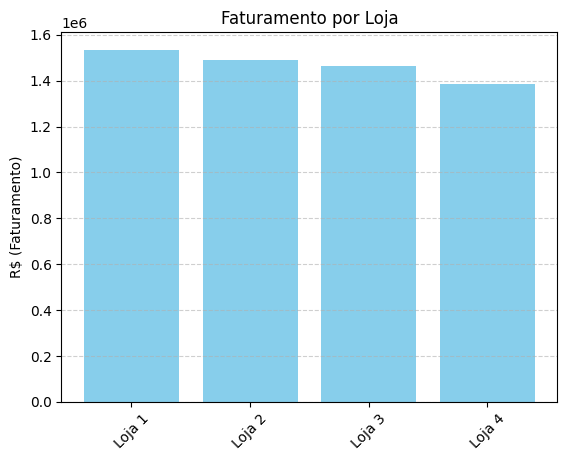

In [25]:
import matplotlib.pyplot as plt


faturamento_lojas = {
    "Loja 1": loja["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum()
}


plt.bar(faturamento_lojas.keys(), faturamento_lojas.values(), color='skyblue')
plt.title("Faturamento por Loja")
plt.ylabel("R$ (Faturamento)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.savefig("grafico_faturamento.png", dpi=300, bbox_inches="tight")
plt.show()


# **2. Vendas por Categoria**


In [26]:
categoria_loja1 = loja["Categoria do Produto"].value_counts()
categoria_loja2 = loja2["Categoria do Produto"].value_counts()
categoria_loja3 = loja3["Categoria do Produto"].value_counts()
categoria_loja4 = loja4["Categoria do Produto"].value_counts()


df_categorias = pd.DataFrame({
    "Loja 1": categoria_loja1,
    "Loja 2": categoria_loja2,
    "Loja 3": categoria_loja3,
    "Loja 4": categoria_loja4
})

df_categorias

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


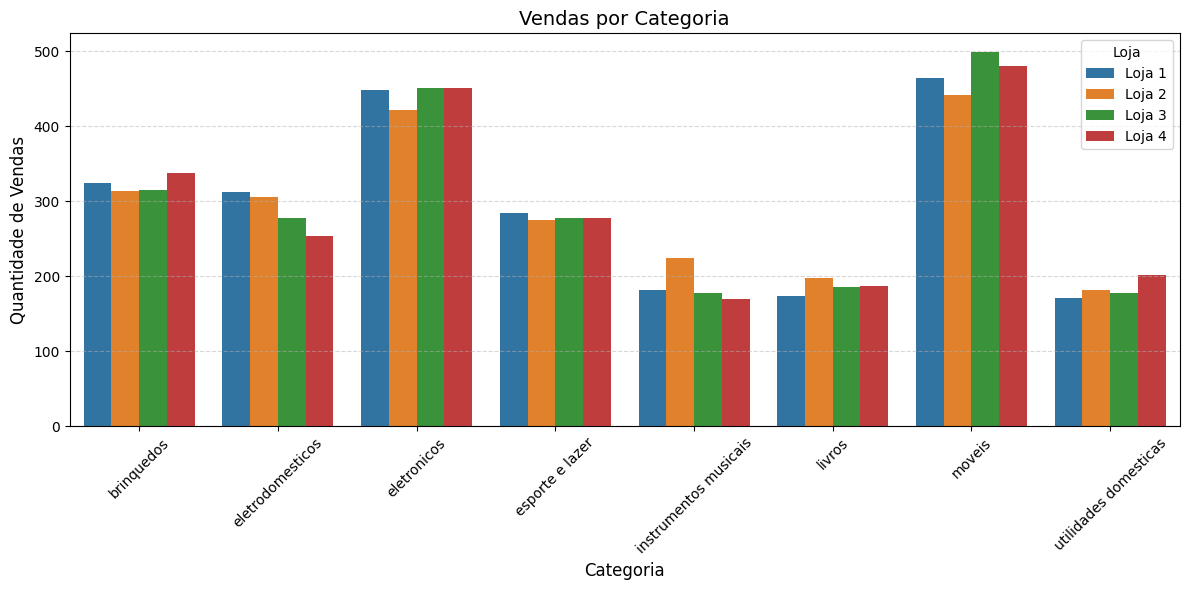

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_long = df_categorias.reset_index().melt(id_vars="Categoria do Produto",
                                            var_name="Loja",
                                            value_name="Quantidade")

plt.figure(figsize=(12,6))
sns.barplot(data=df_long, x="Categoria do Produto", y="Quantidade", hue="Loja")

plt.title("Vendas por Categoria", fontsize=14)
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("grafico_categorias.png", dpi=300, bbox_inches="tight")
plt.show()


# **3. Média de Avaliação das Lojas**


In [28]:
media_loja1 = loja["Avaliação da compra"].mean()
media_loja2 = loja2["Avaliação da compra"].mean()
media_loja3 = loja3["Avaliação da compra"].mean()
media_loja4 = loja4["Avaliação da compra"].mean()

df_media_avaliacao = pd.DataFrame({
    "Loja 1": [media_loja1],
    "Loja 2": [media_loja2],
    "Loja 3": [media_loja3],
    "Loja 4": [media_loja4]
})

df_media_avaliacao

,Loja 1,Loja 2,Loja 3,Loja 4
0,3.976685,4.037304,4.048326,3.995759


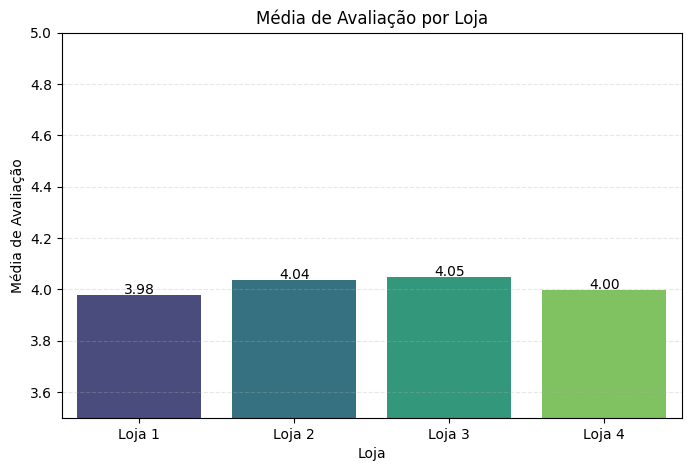

In [29]:
df_media_avaliacao_long = df_media_avaliacao.reset_index().melt(id_vars="index",
                                                                var_name="Loja",
                                                                value_name="Média de Avaliação")
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_media_avaliacao_long, x="Loja", y="Média de Avaliação", hue="Loja", palette="viridis", legend=False)

for p in ax.patches:
  altura = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., altura + 0.02, f'{altura:.2f}', ha='center', va='center')

plt.title("Média de Avaliação por Loja")
plt.ylim(3.5, 5)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.savefig("grafico_avaliacao.png", dpi=300, bbox_inches="tight")
plt.show()


# **4. Produtos Mais e Menos Vendidos**

In [30]:
lojas = [loja, loja2, loja3, loja4]

for i, loja in enumerate(lojas, start=1):
    contagem = loja["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()
    print(f"Loja {i}:")
    print(f"Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"Produto menos vendido: {menos_vendido} ({contagem.min()} vendas)\n")


Loja 1:
Produto mais vendido: Micro-ondas (60 vendas)
Produto menos vendido: Headset (33 vendas)

Loja 2:
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)

Loja 3:
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)

Loja 4:
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)



In [31]:
dados_produtos = []

for i, loja in enumerate(lojas, start=1):
    contagem = loja["Produto"].value_counts()
    dados_produtos.append({
        "Loja": f"Loja {i}",
        "Tipo": "Mais Vendido",
        "Produto": contagem.idxmax(),
        "Quantidade": contagem.max()
    })
    dados_produtos.append({
        "Loja": f"Loja {i}",
        "Tipo": "Menos Vendido",
        "Produto": contagem.idxmin(),
        "Quantidade": contagem.min()
    })

df_produtos = pd.DataFrame(dados_produtos)

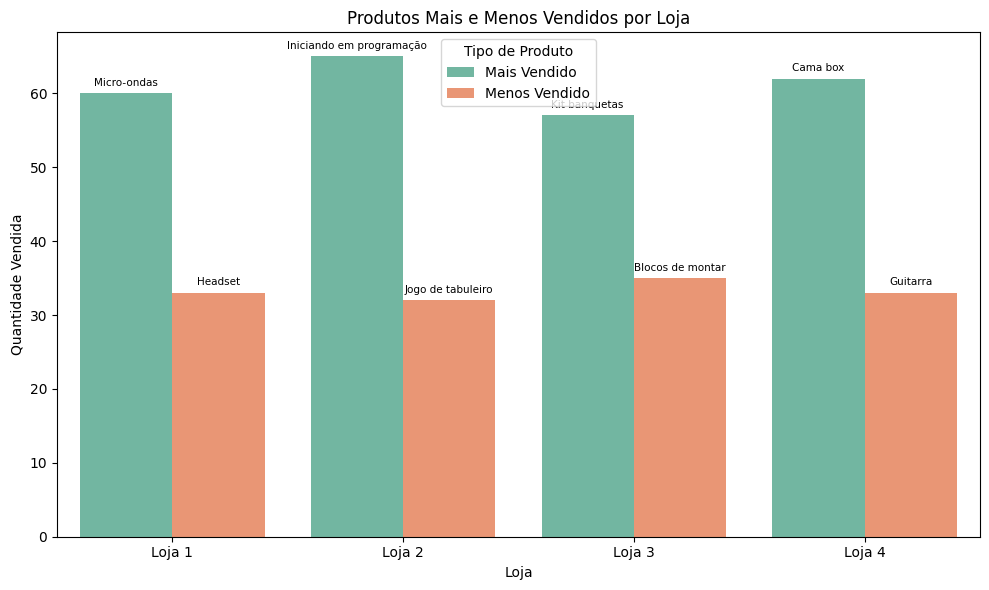

In [41]:
plt.figure(figsize=(10, 6))
grafico = sns.barplot(data=df_produtos, x="Loja", y="Quantidade", hue="Tipo", palette="Set2")


produtos_mais_vendidos = list(df_produtos[df_produtos["Tipo"] == "Mais Vendido"]["Produto"])
produtos_menos_vendidos = list(df_produtos[df_produtos["Tipo"] == "Menos Vendido"]["Produto"])
produtos_ordenados_para_grafico = produtos_mais_vendidos + produtos_menos_vendidos


for barra, produto in zip(grafico.patches, produtos_ordenados_para_grafico):
    x = barra.get_x() + barra.get_width() / 2
    y = barra.get_height() + 1
    plt.text(x=x, y=y, s=produto, ha='center', fontsize=7.5, rotation=0)

plt.title("Produtos Mais e Menos Vendidos por Loja")
plt.ylabel("Quantidade Vendida")
plt.xlabel("Loja")
plt.legend(title="Tipo de Produto")
plt.tight_layout()

plt.savefig("grafico_produtos.png", dpi=300, bbox_inches="tight")
plt.show()

# **5. Frete Médio por Loja**


In [33]:
media_frete_loja1 = loja["Frete"].mean()
media_frete_loja2 = loja2["Frete"].mean()
media_frete_loja3 = loja3["Frete"].mean()
media_frete_loja4 = loja4["Frete"].mean()

df_media_frete = pd.DataFrame({
    "Loja 1": [media_frete_loja1],
    "Loja 2": [media_frete_loja2],
    "Loja 3": [media_frete_loja3],
    "Loja 4": [media_frete_loja4]
})

df_media_frete

,Loja 1,Loja 2,Loja 3,Loja 4
0,31.278997,33.621941,33.074464,31.278997


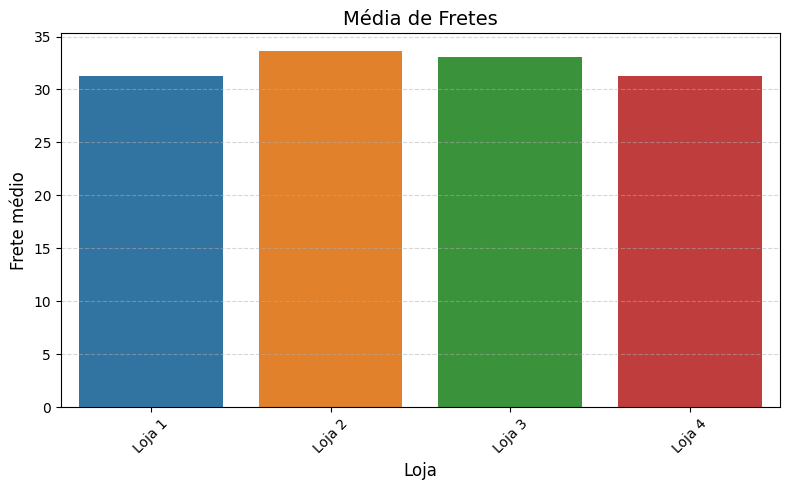

In [34]:
df_long = df_media_frete.reset_index().melt(id_vars="index",
                                            var_name="Loja",
                                            value_name="Frete médio")
plt.figure(figsize=(8,5))
sns.barplot(data=df_long, x="Loja", y="Frete médio", hue="Loja")
plt.title("Média de Fretes", fontsize=14)
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Frete médio", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("grafico_frete.png", dpi=300, bbox_inches="tight")
plt.show()

# **6. Visualizações Finais**


## Gráfico 1 - Faturamento por Loja
Este gráfico mostra o total de faturamento de cada loja. Ele permite identificar qual loja gerou mais receita no período analisado, sendo um indicador importante de desempenho financeiro.

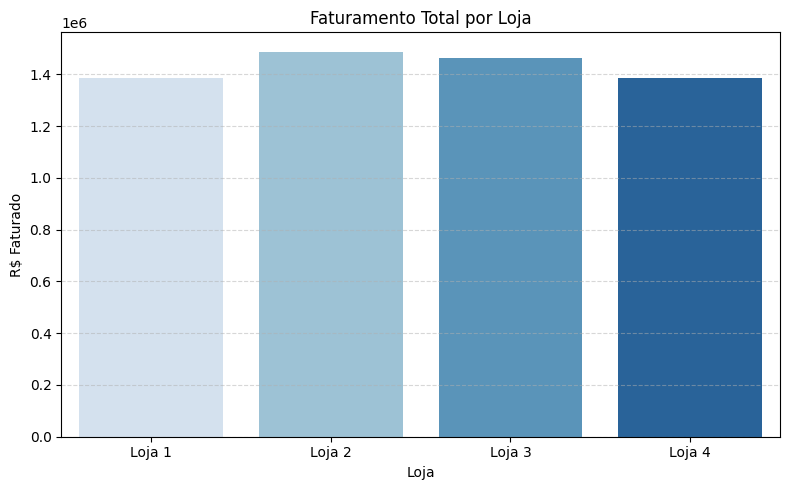

In [35]:
faturamento_lojas = {
    "Loja 1": loja["Preço"].sum(),
    "Loja 2": loja2["Preço"].sum(),
    "Loja 3": loja3["Preço"].sum(),
    "Loja 4": loja4["Preço"].sum(),
}

df_faturamento = pd.DataFrame(faturamento_lojas.items(), columns=["Loja", "Faturamento"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df_faturamento, x="Loja", y="Faturamento", hue="Loja" , legend=False , palette="Blues")
plt.title("Faturamento Total por Loja")
plt.ylabel("R$ Faturado")
plt.xlabel("Loja")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("grafico_faturamento_total.png", dpi=300, bbox_inches="tight")
plt.show()


## Gráfico 2 - Distribuição das Categorias de Produtos

Este gráfico de pizza, apresenta a proporção de vendas por categoria de produto. Ele ajuda a visualizar quais tipos de produtos são mais vendidos e, consequentemente, quais categorias merecem mais atenção.



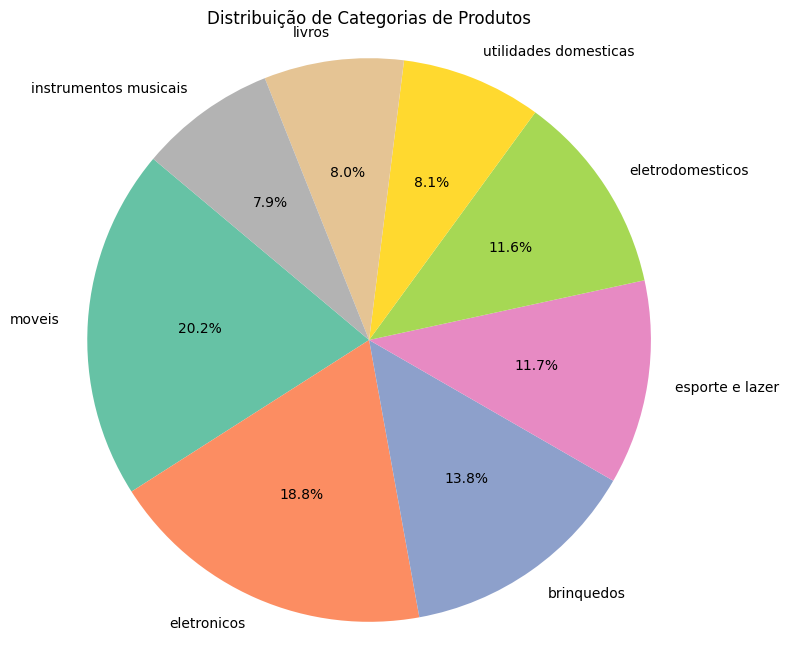

In [36]:
df_geral = pd.concat([loja, loja2, loja3, loja4])

categorias = df_geral["Categoria do Produto"].value_counts()
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

plt.figure(figsize=(8,8))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title("Distribuição de Categorias de Produtos")
plt.axis('equal')

plt.savefig("grafico_categorias_geral.png", dpi=300, bbox_inches="tight")
plt.show()

## Gráifco 3 - Avaliação Média por Faixa de Preço

Este gráfico de barras agrupa os produtos por faixas de preço e mostra a média das avaliações dos clientes em cada faixa. Dessa forma, conseguimos identificar se produtos mais caros têm melhor ou pior avaliação, facilitando a percepção de custo-benefício por parte dos consumidores.



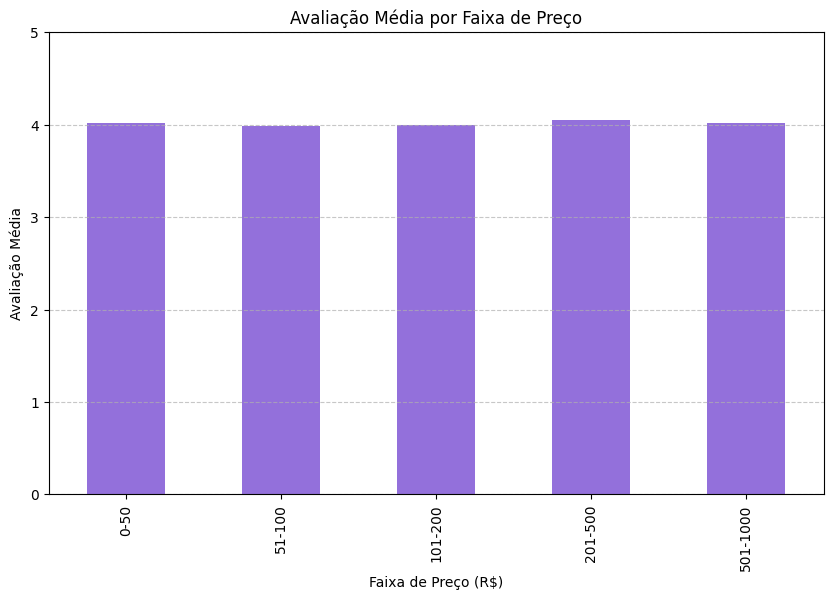

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df['Faixa de Preço'] = pd.cut(df['Preço'],
                              bins=[0, 50, 100, 200, 500, 1000],
                              labels=['0-50', '51-100', '101-200', '201-500', '501-1000'])

media_avaliacao_faixa = df.groupby('Faixa de Preço', observed=True)['Avaliação da compra'].mean()

media_avaliacao_faixa.plot(kind='bar',
                           color='mediumpurple',
                           figsize=(10, 6),
                           title='Avaliação Média por Faixa de Preço')

plt.ylabel('Avaliação Média')
plt.xlabel('Faixa de Preço (R$)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("grafico_avaliacao_preco.png", dpi=300, bbox_inches="tight")
plt.show()




# **Relatório Final – Análise de Desempenho das Lojas da Alura Store**

## Introdução

Este relatório tem como objetivo identificar qual das quatro unidades da Alura Store apresenta o desempenho mais fraco, a fim de orientar o Senhor João na tomada de decisão sobre qual loja vender. Para isso, foram analisados os seguintes critérios:

- Faturamento total das lojas  
- Categorias de produtos com maior e menor volume de vendas  
- Média de avaliação dos clientes  
- Produtos mais e menos vendidos  
- Frete médio por loja

As análises foram baseadas em dados fictícios de vendas e avaliações, com o apoio de visualizações que tornaram as comparações mais claras e objetivas.

---

## Análise dos Dados

### Faturamento Total

A loja com maior faturamento foi a **Loja 1**, com **R\$ 1.534.509,12**, seguida pela **Loja 2** (**R\$ 1.488.459,06**), **Loja 3** (**R\$ 1.464.025,03**) e, por fim, a **Loja 4**, com o menor faturamento: **R\$ 1.384.497,58**.


**Gráfico de barras**: evidencia a Loja 4 com o pior desempenho em receita.


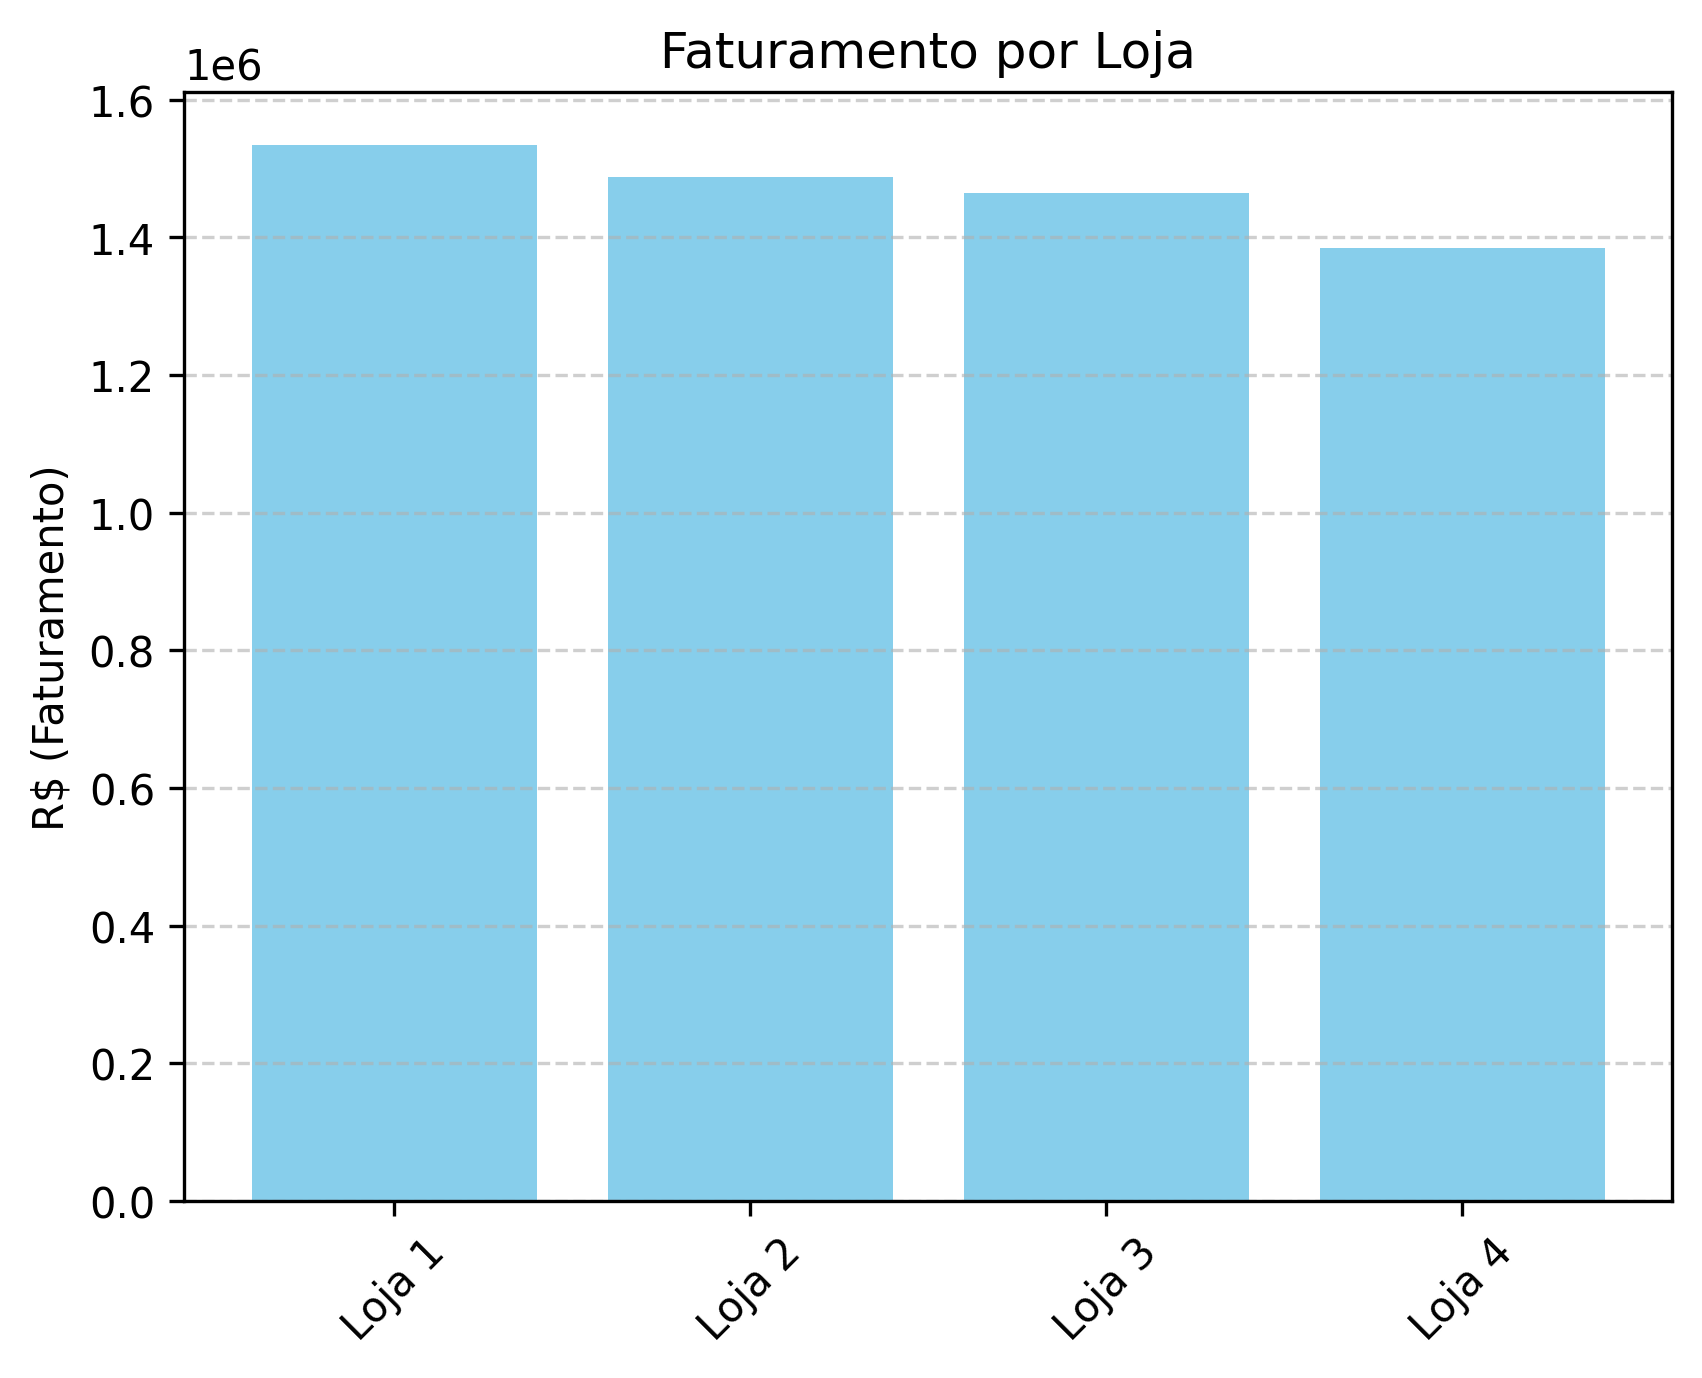

---

### Vendas por Categoria de Produtos

- **Mais vendidas:** "Eletrônicos" e "Móveis" dominaram nas quatro lojas  
- **Menos vendidas:** "Utilidades Domésticas" e "Livros" tiveram pouca saída  
- A **Loja 4** teve desempenho especialmente fraco na categoria **"Eletrodomésticos"**

> **Gráfico comparativo por categoria:** mostra essas tendências de forma visual


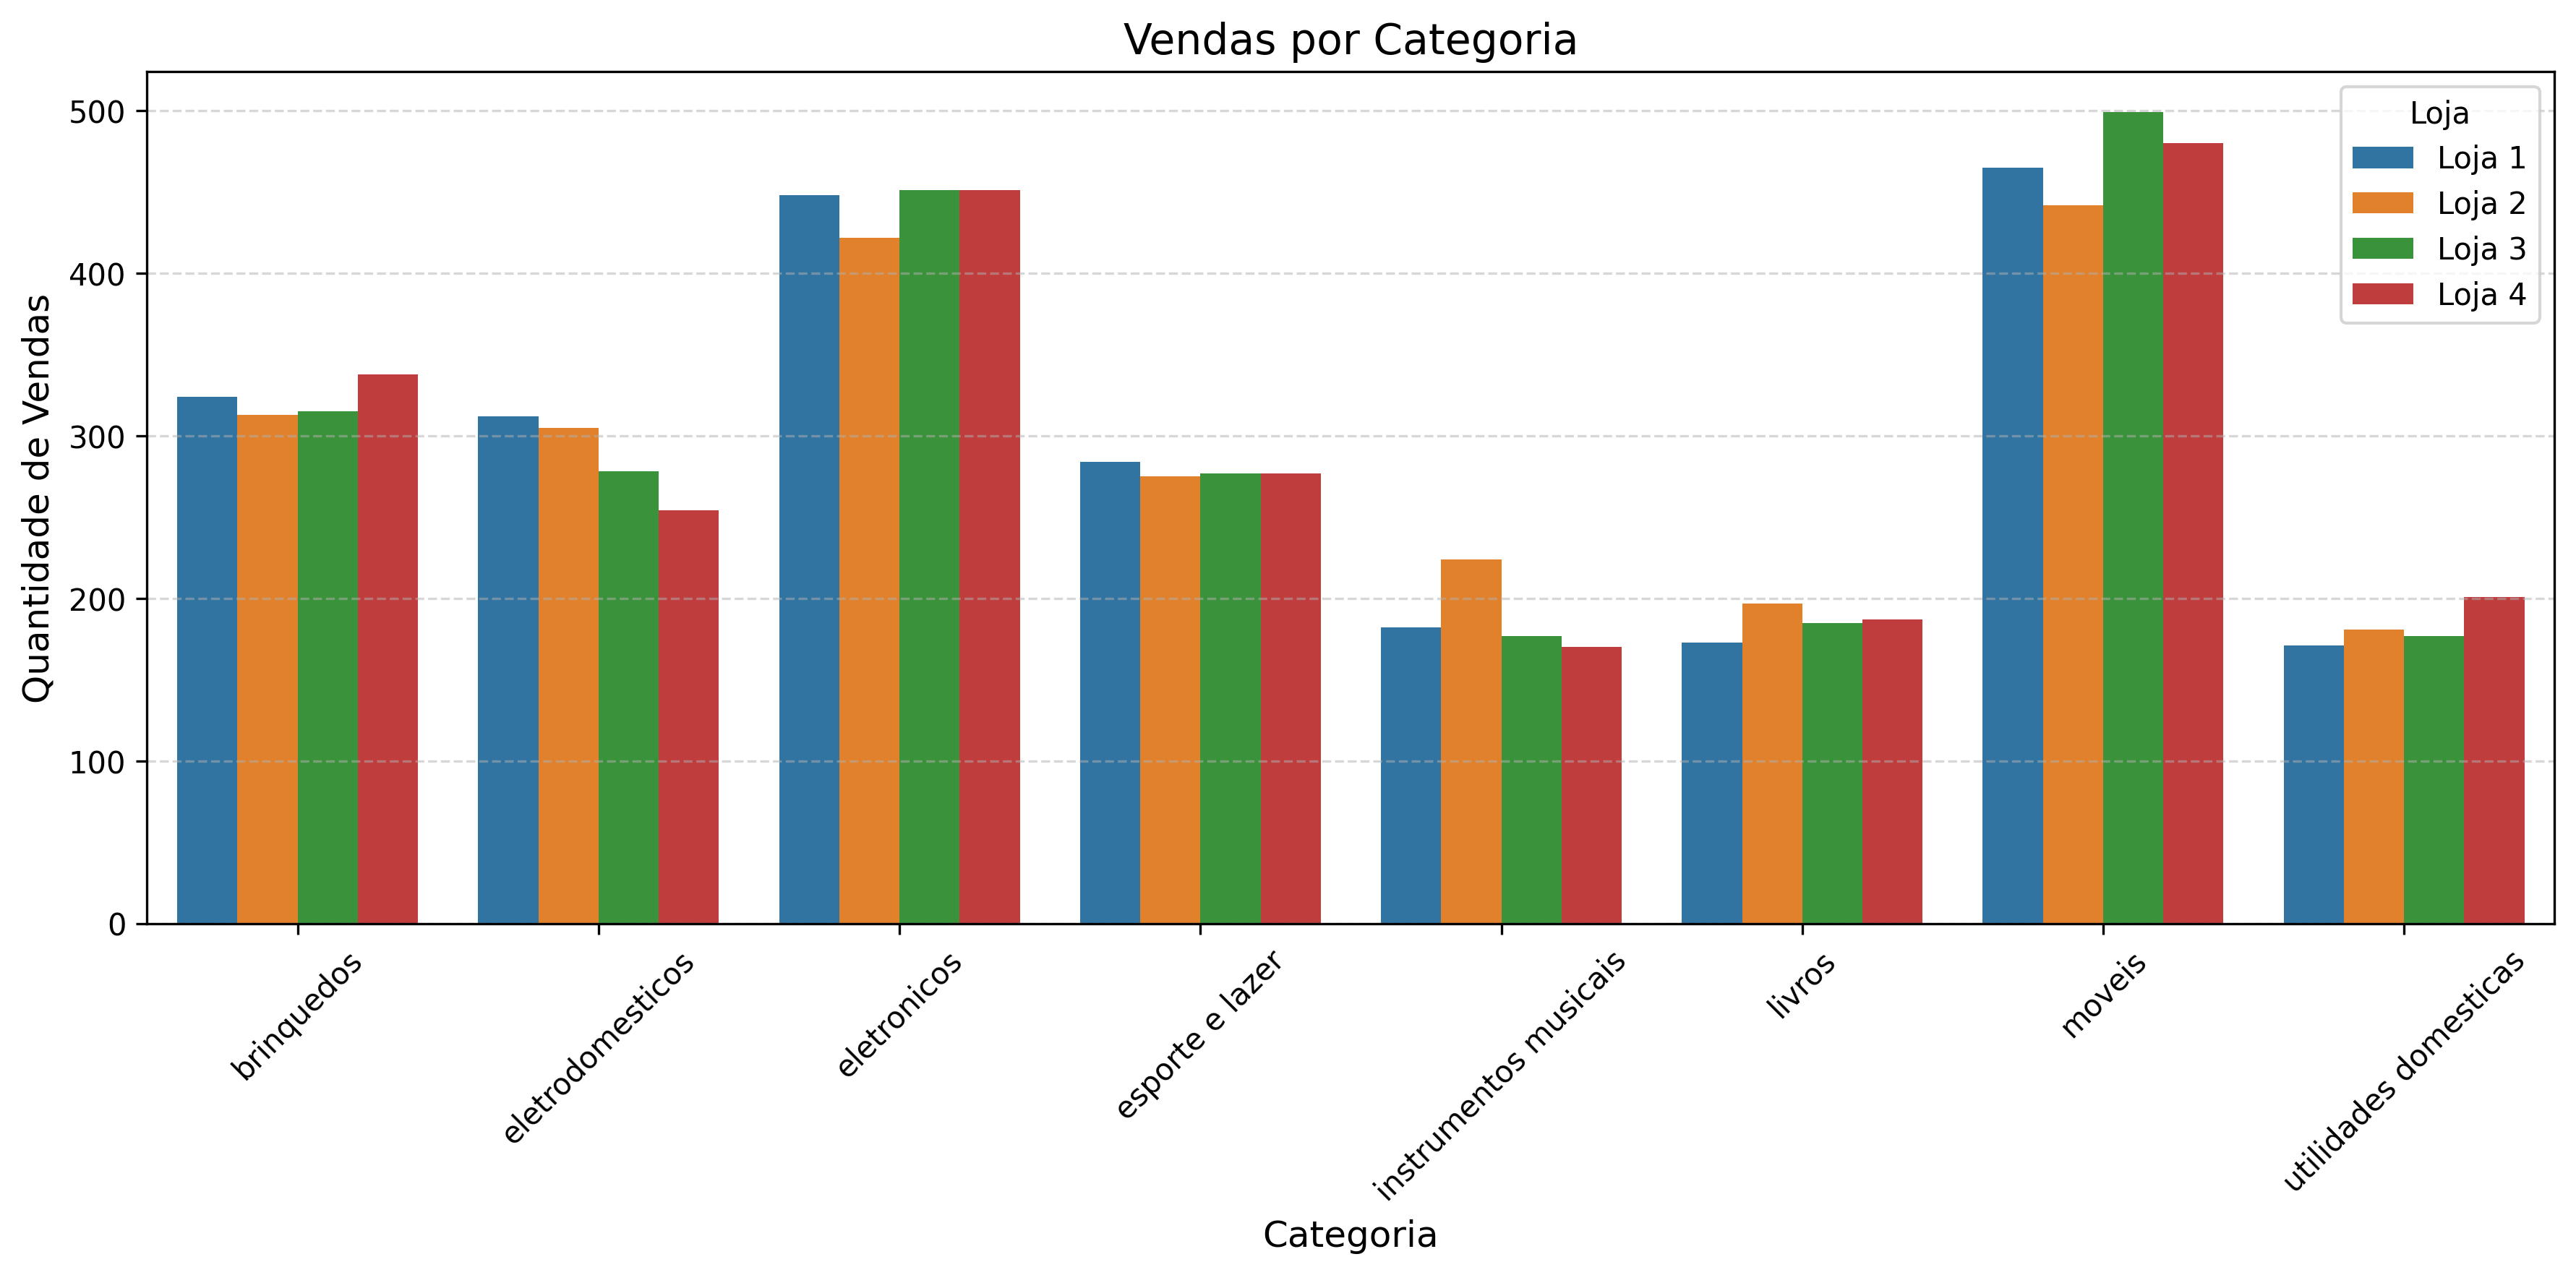

---

### Média de Avaliações dos Clientes

- **Loja 3:** 4,05 (melhor média)  
- **Loja 2:** 4,04  
- **Loja 4:** 4,00  
- **Loja 1:** 3,98 (menor média)

As diferenças são pequenas, mas indicam maior satisfação dos clientes na Loja 3. Loja 1 e Loja 4 precisam de mais atenção nesse aspecto.

> **Gráfico de avaliação por loja:** facilita a comparação das médias

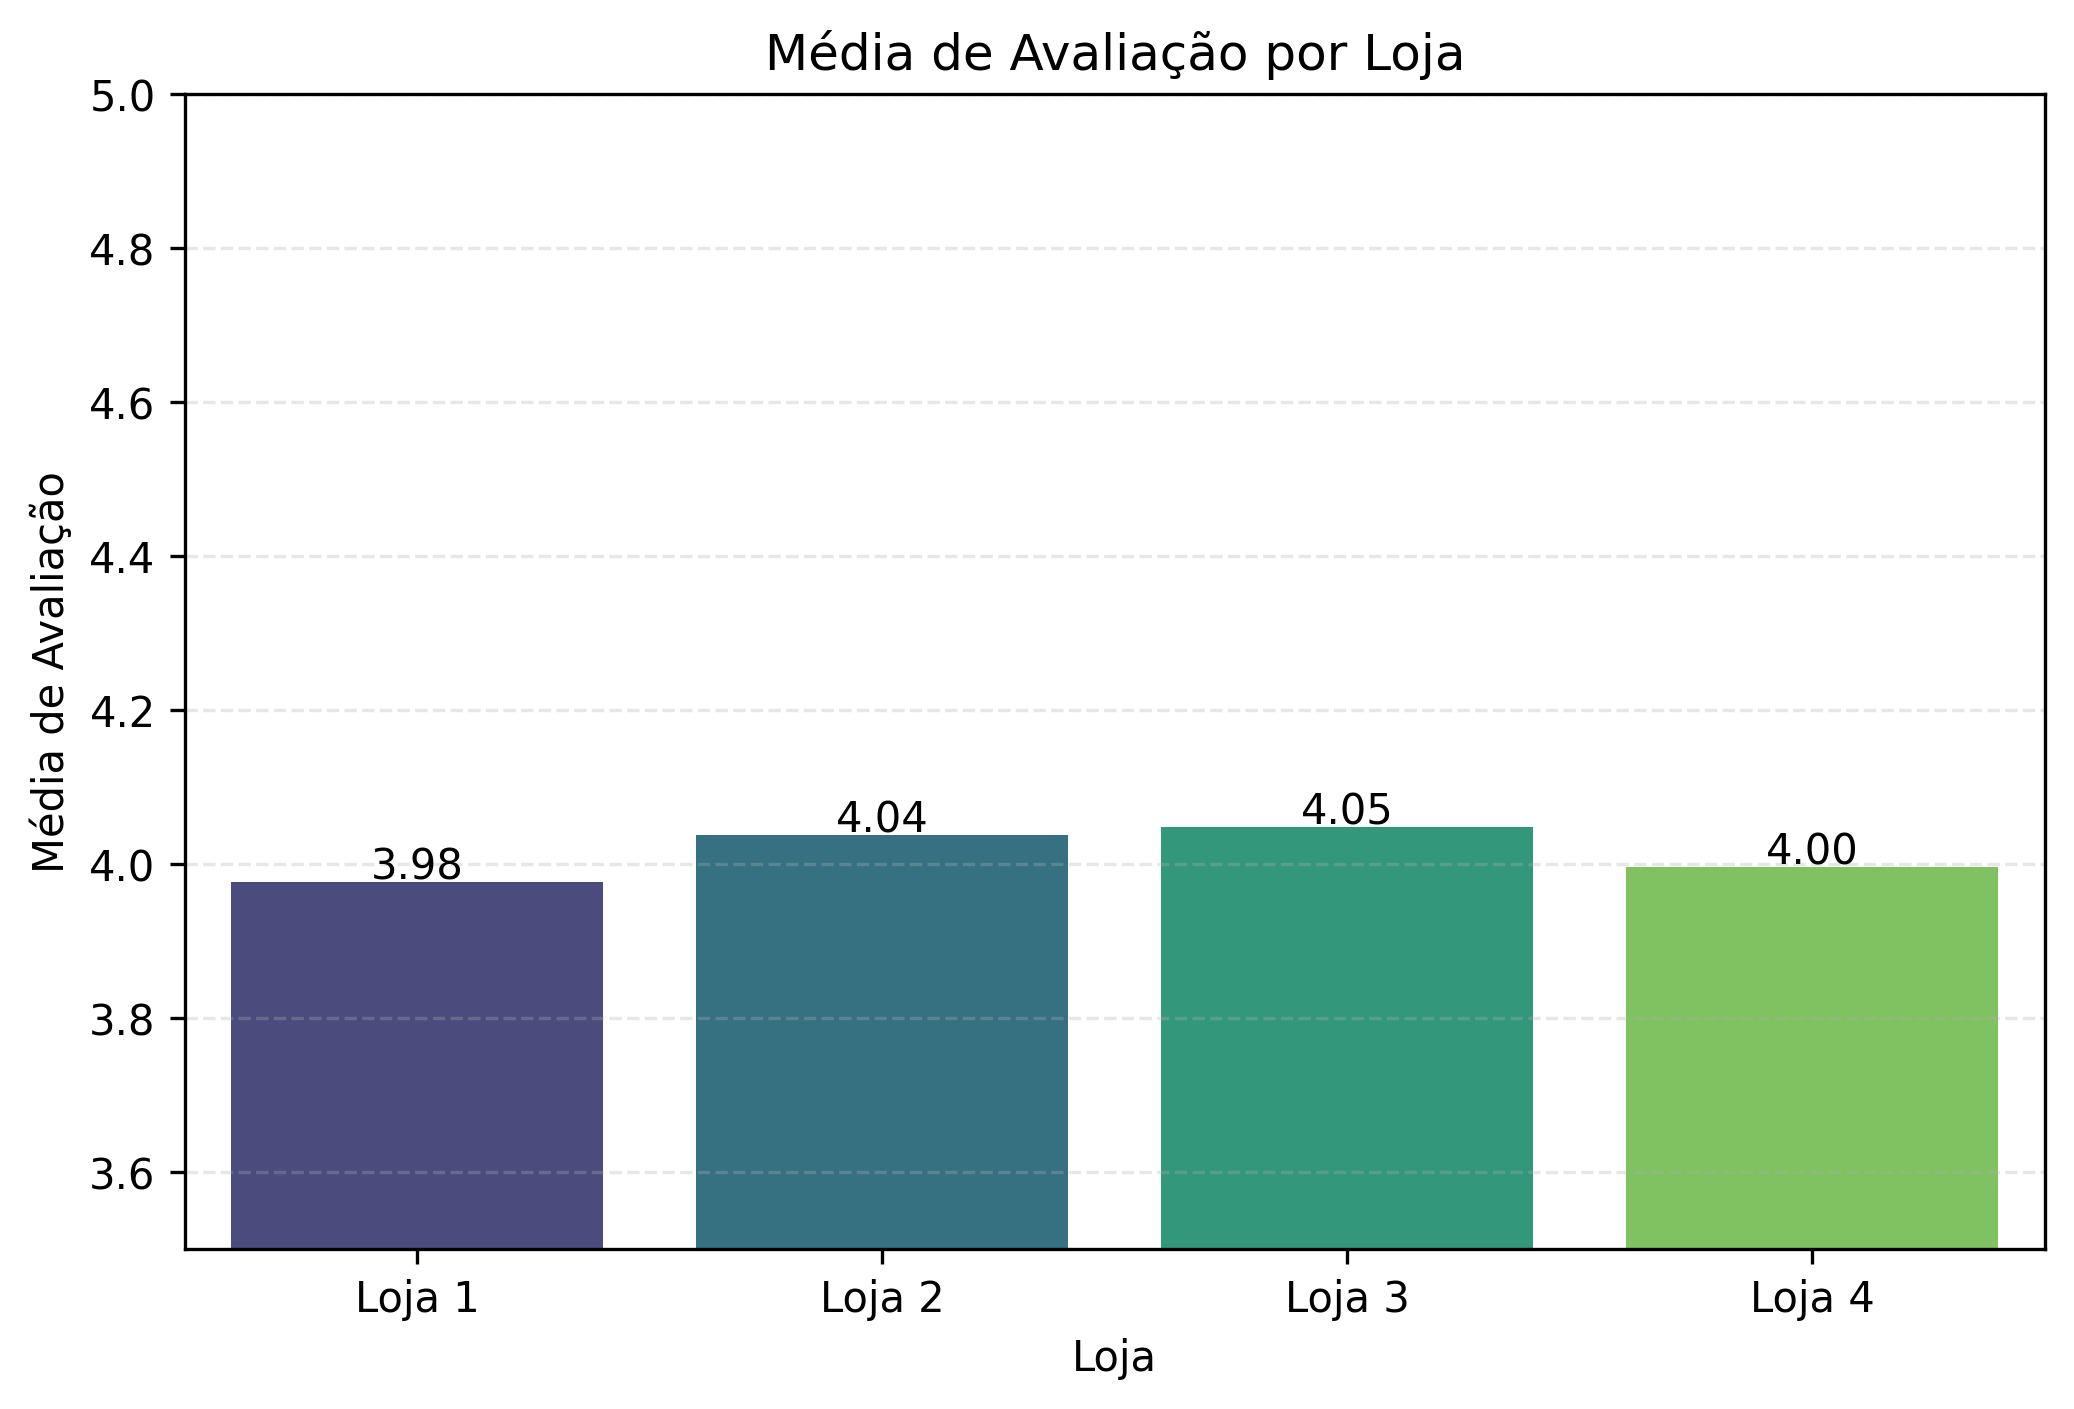

---

### Produtos Mais e Menos Vendidos

| Loja   | Mais vendido                             | Menos vendido       |
|--------|------------------------------------------|---------------------|
| Loja 1 | Micro-ondas (60)                         | Headset (33)        |
| Loja 2 | Livro “Iniciando em programação” (65)    | Jogo de tabuleiro (32) |
| Loja 3 | Kit banquetas (57)                       | Blocos de montar (35) |
| Loja 4 | Cama box (62)                            | Guitarra (33)       |

Esses dados ajudam a entender o perfil de vendas de cada loja, embora o foco para decisão de venda deva ser o desempenho agregado.

> **Gráfico de produtos por loja:** destaca os produtos com maior e menor saída

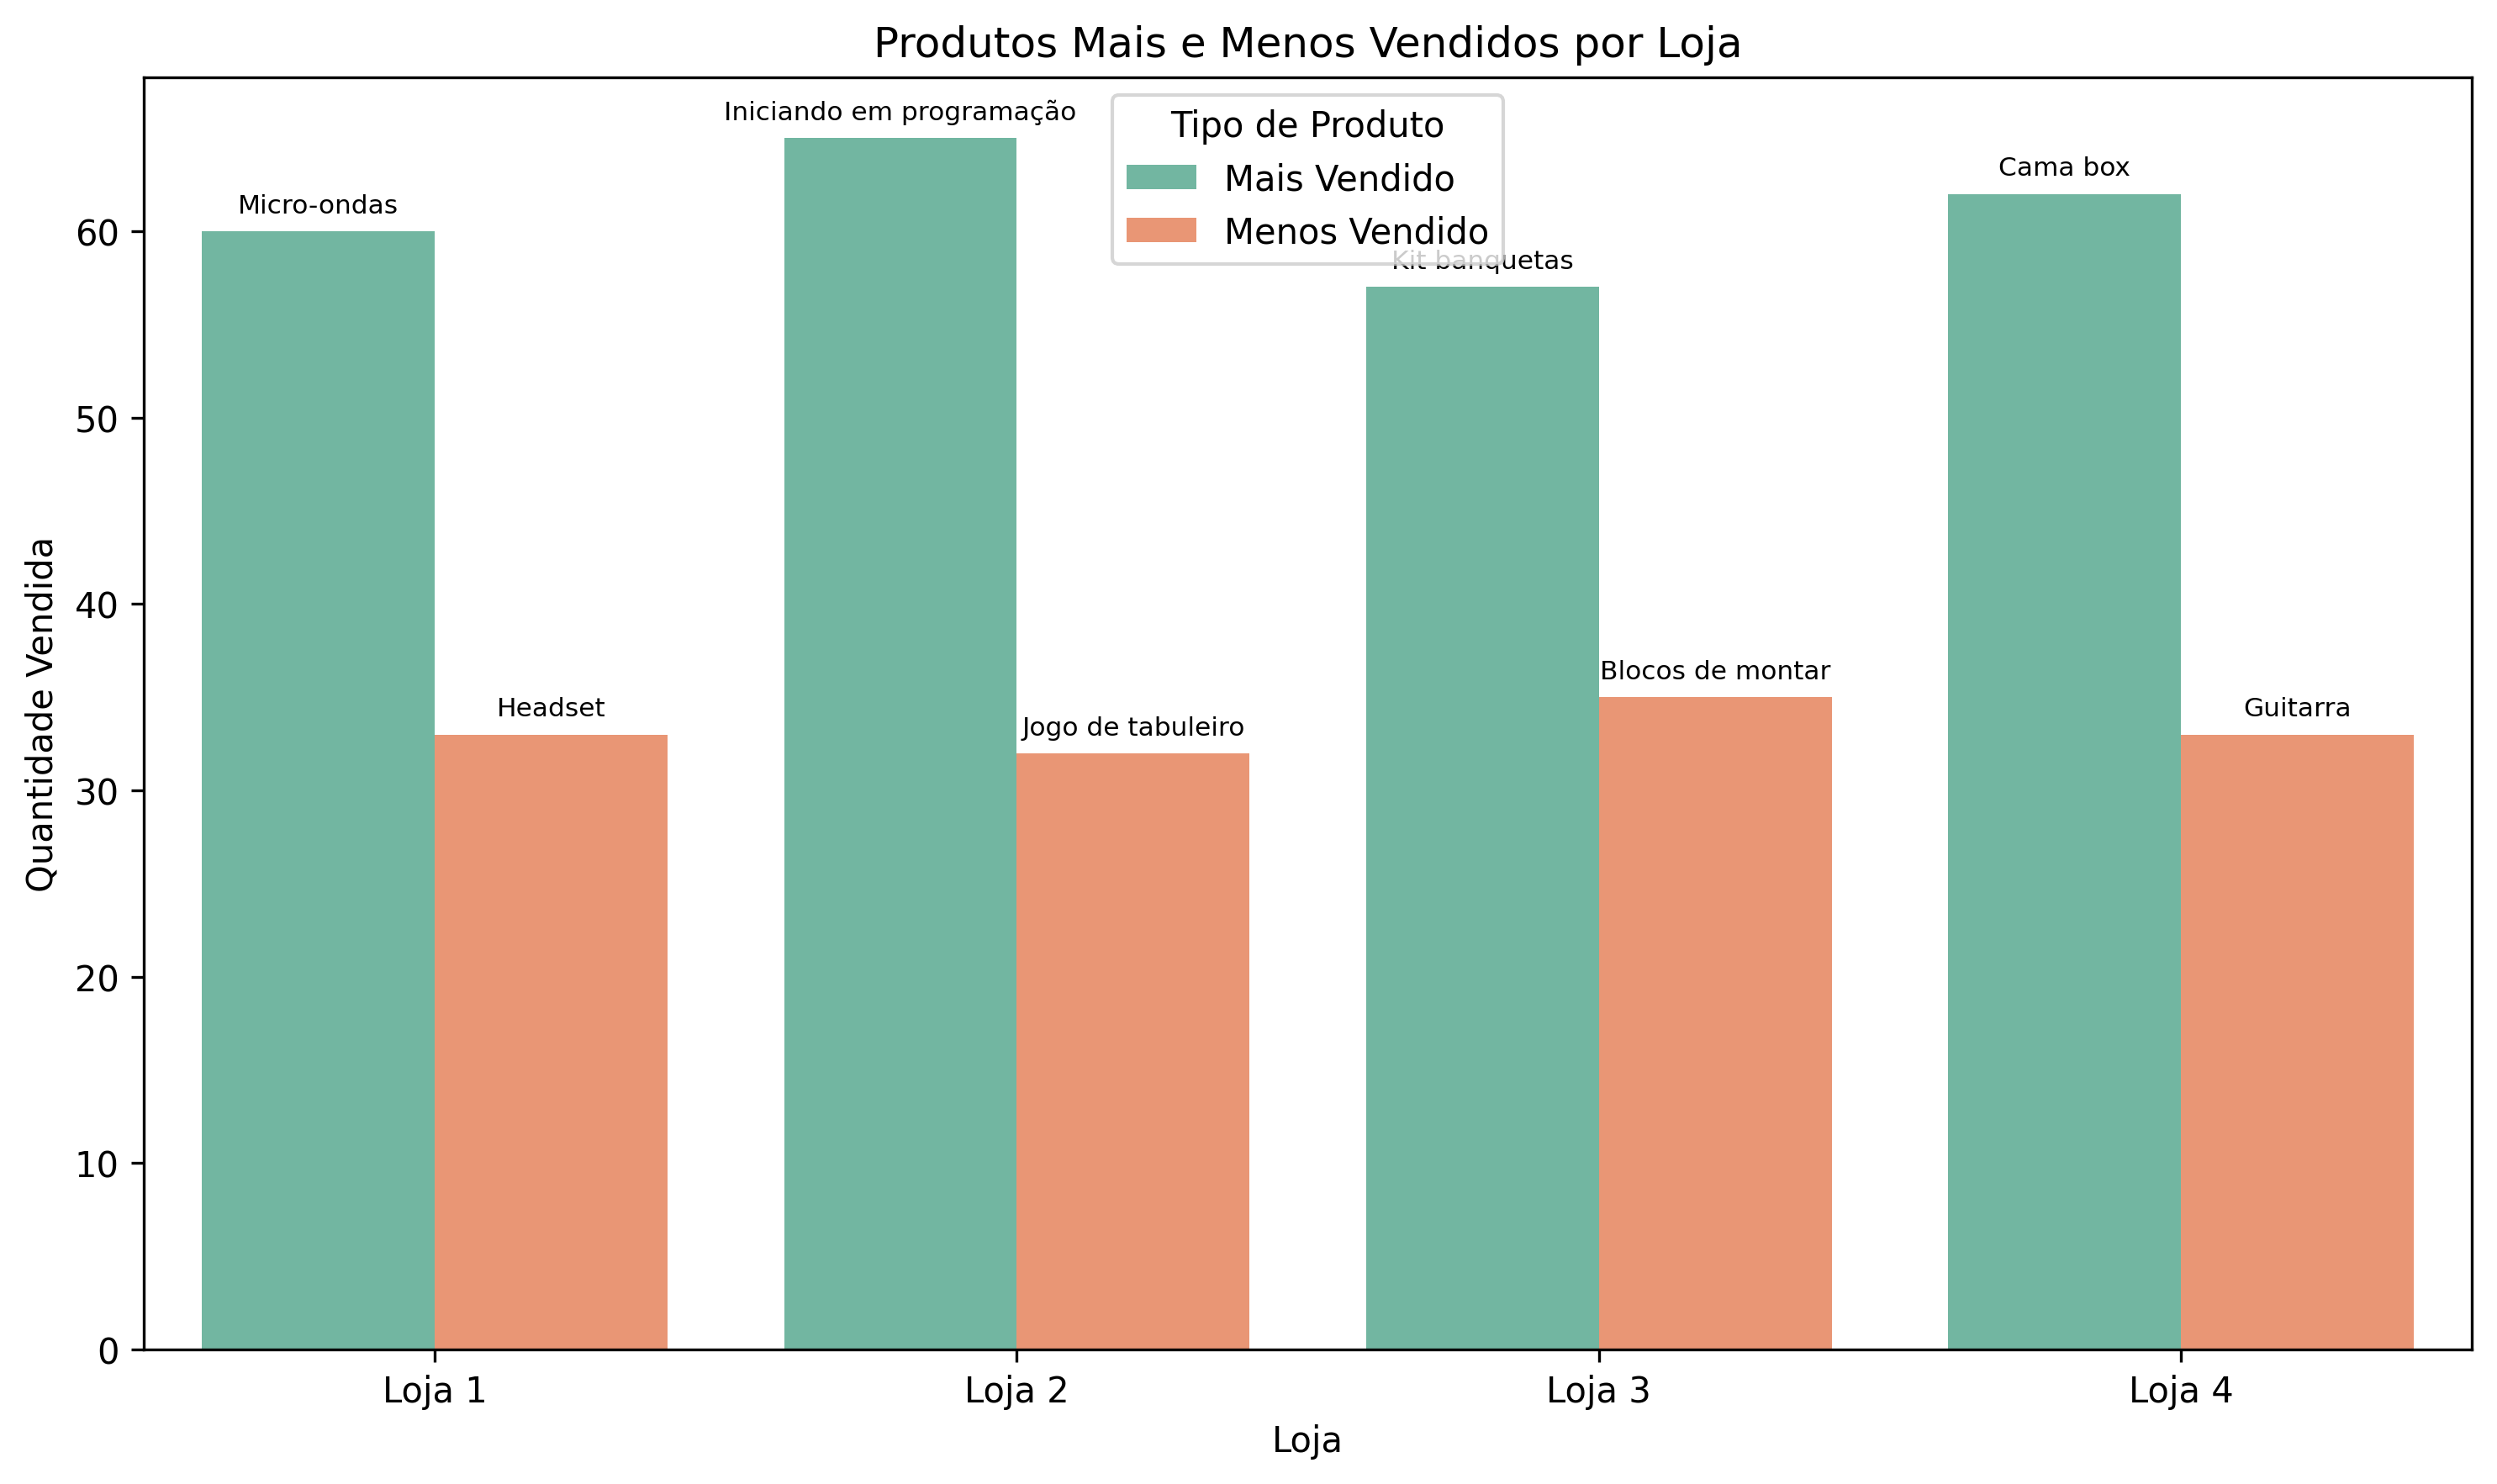

---

### Frete Médio por Loja

- **Loja 1 e Loja 4:** R$ 31,28 (menor valor)  

- **Loja 3:** R$ 33,07  

- **Loja 2:** R$ 33,62 (maior valor)

Fretes menores podem melhorar a percepção do cliente, sendo um ponto positivo para Loja 1 e Loja 4.

> **Gráfico de frete médio:** mostra os custos médios de frete por loja

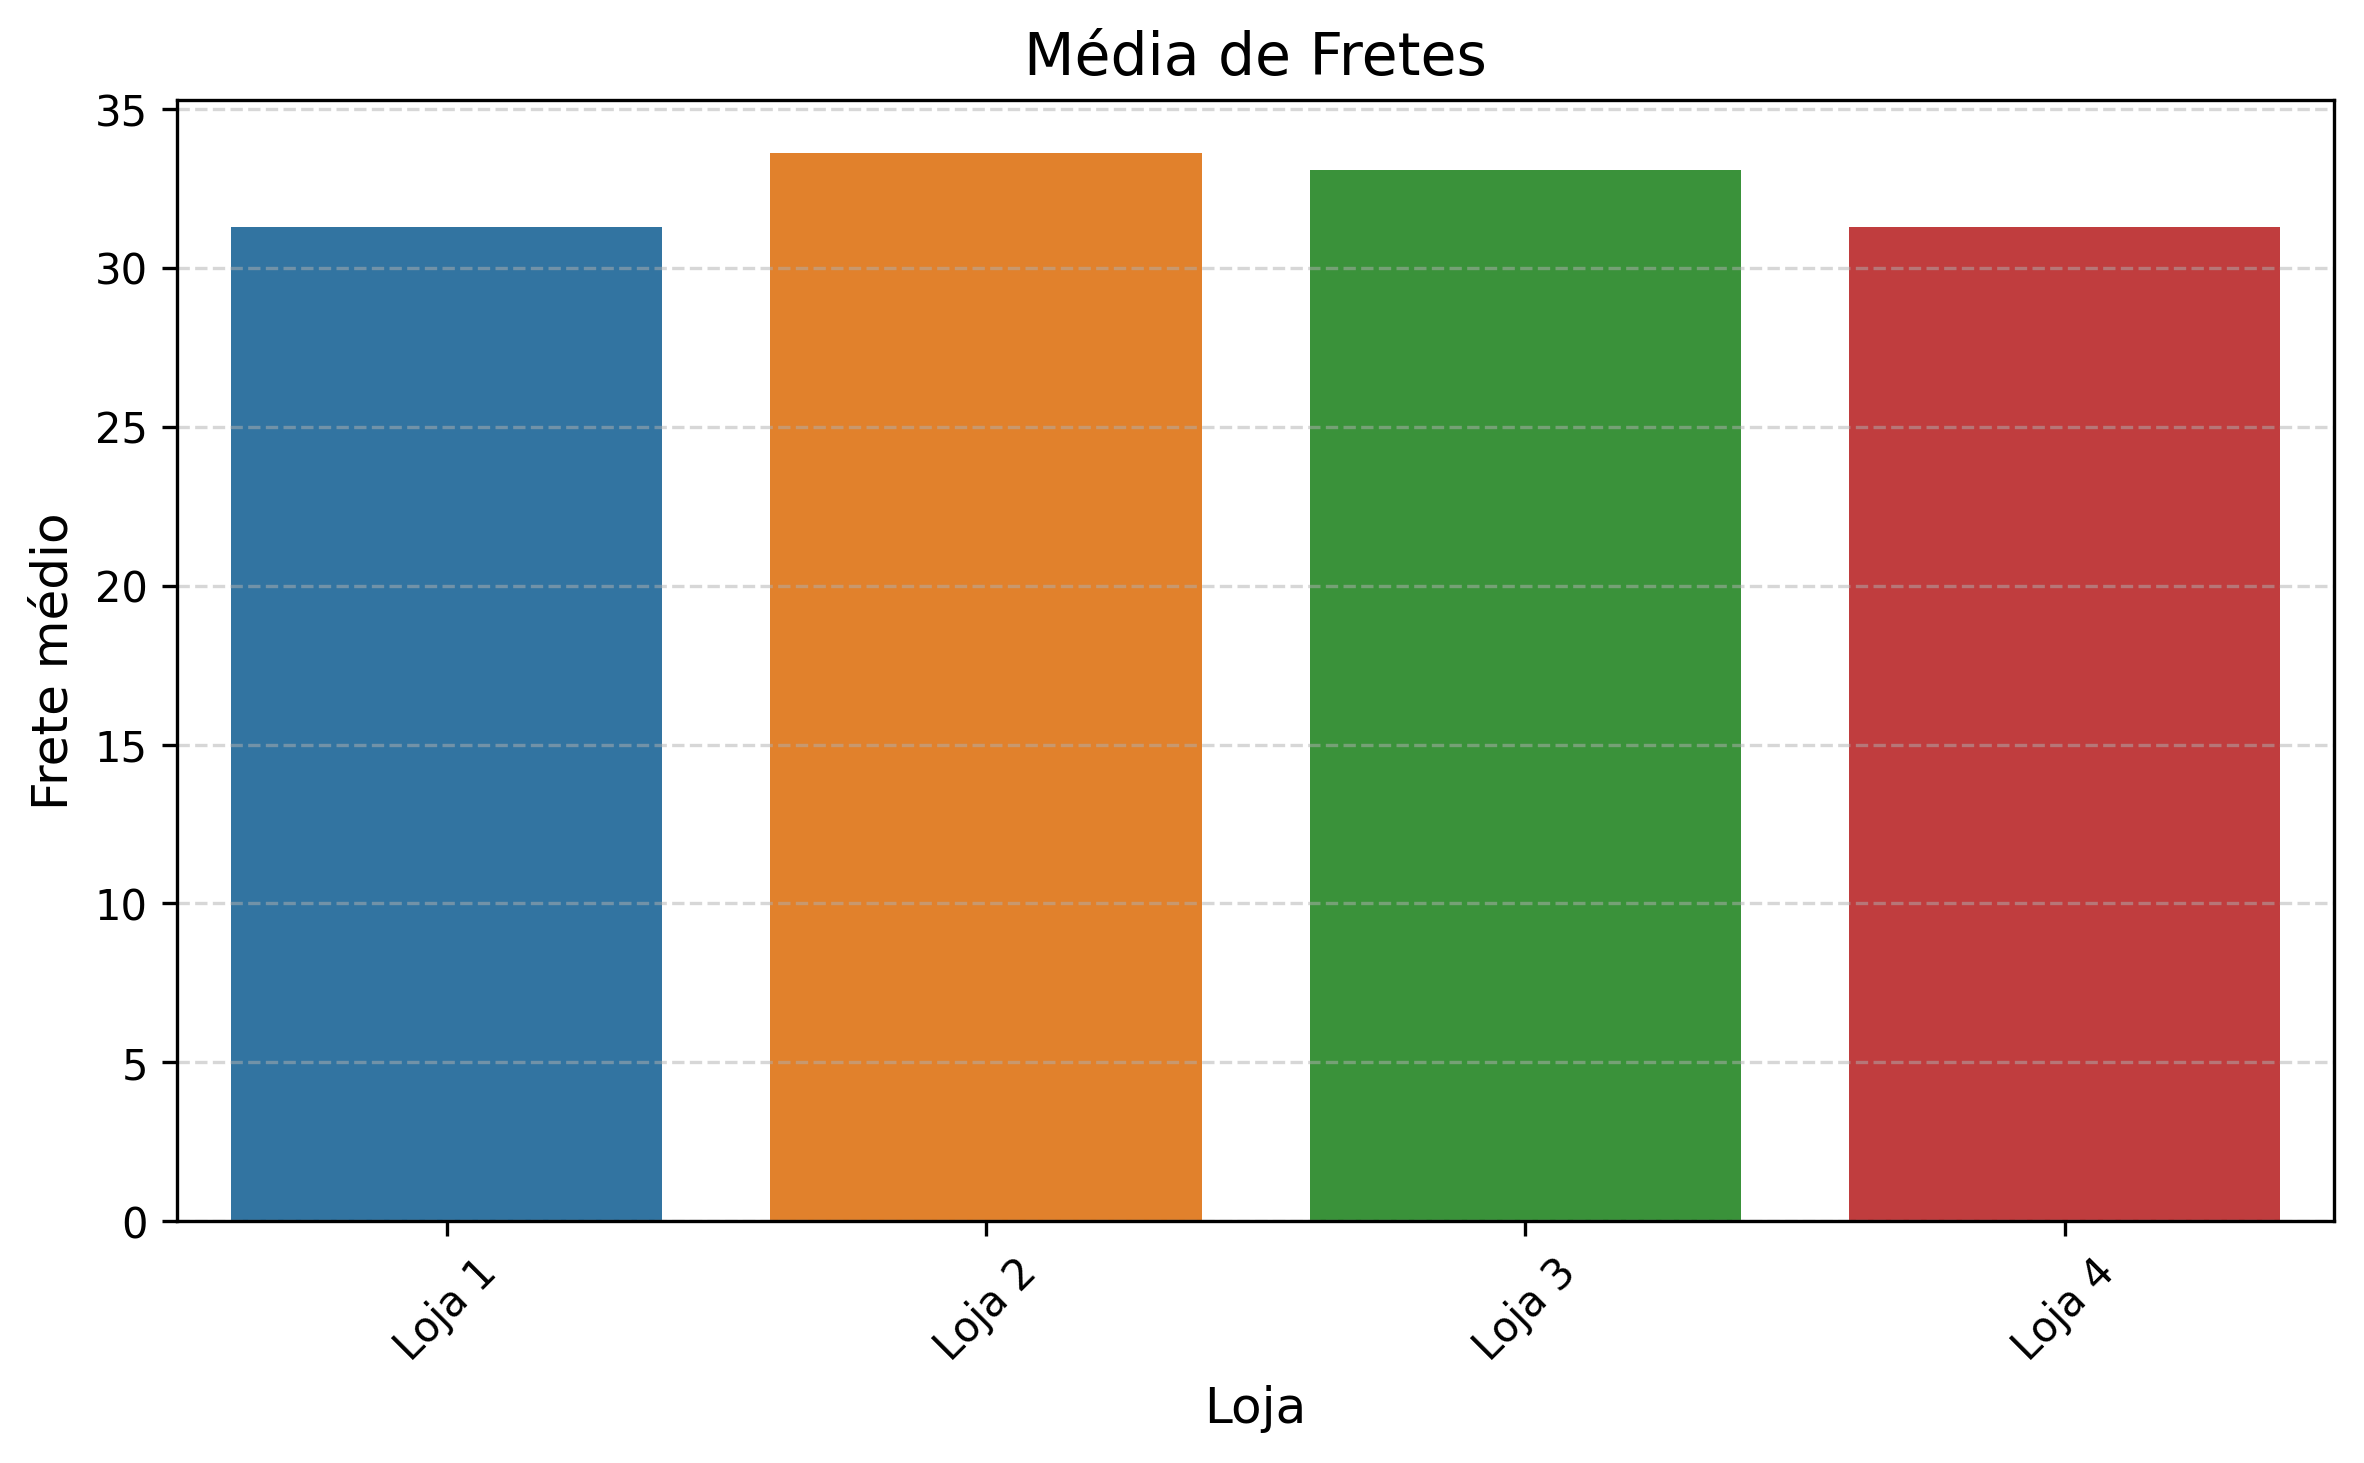

---

## Visualizações Finais

- **Gráfico 1 – Faturamento por Loja:** Loja 4 é a que fatura menos  
- **Gráfico 2 – Vendas por Categoria (Geral):** "Eletrônicos" e "Móveis" lideram; "Livros" e "Utilidades Domésticas" têm baixa saída  
- **Gráfico 3 – Avaliação Média por Faixa de Preço:** Mostra como o preço influencia na avaliação dos clientes (útil para contexto geral)

---

## Conclusão e Recomendação

Com base em todos os dados analisados, **a Loja 4 é a candidata mais indicada para ser vendida.**

### Justificativas:

- **Faturamento mais baixo** entre as quatro unidades  
- **Desempenho inferior** em categorias importantes como "Eletrodomésticos"  
- **Avaliação de clientes** abaixo das lojas de melhor desempenho  
- Embora o **frete médio** seja competitivo, ele não compensa as demais deficiências

---

## Resumo dos Pontos Fortes e Fracos

| Loja     | Pontos Fortes                           | Pontos Fracos                                        |
|----------|------------------------------------------|------------------------------------------------------|
| **Loja 1** | Maior faturamento                       | Menor avaliação dos clientes                         |
| **Loja 2** | Boa avaliação, alto faturamento         | Frete médio mais alto                                |
| **Loja 3** | Melhor média de avaliação, bom desempenho em “Móveis” | Faturamento intermediário, frete alto |
| **Loja 4** | Frete competitivo                        | Menor faturamento, desempenho fraco em categorias importantes, avaliação mediana |

---

## Recomendação Final

Recomenda-se que o **Senhor João venda a Loja 4**. Essa decisão é sustentada por seu desempenho inferior em diversas métricas importantes, como faturamento e vendas por categoria, além de não se destacar positivamente em nenhum dos critérios avaliados. Concentrar os recursos nas lojas com melhores resultados pode gerar mais retorno e eficiência para o negócio.



